In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#importing the dataset
df_train=pd.read_csv('/Users/Admin/Documents/Python/BlackFridayDataSet/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [27]:
#data type info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
#statistical info
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [30]:
#finding unique values
df_train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

<Axes: xlabel='Purchase', ylabel='Density'>

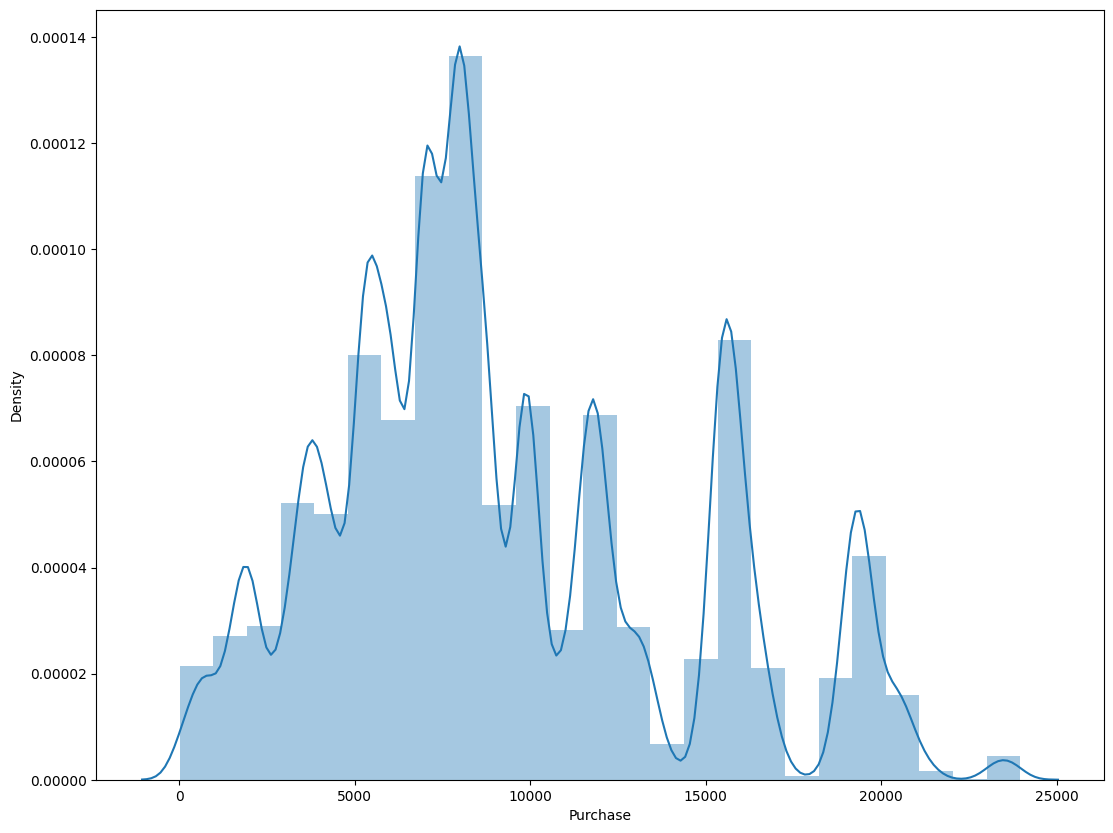

In [31]:
#distplot for Purchase Column
plt.figure(figsize=(13,10))
sns.distplot(df_train['Purchase'],bins=25)

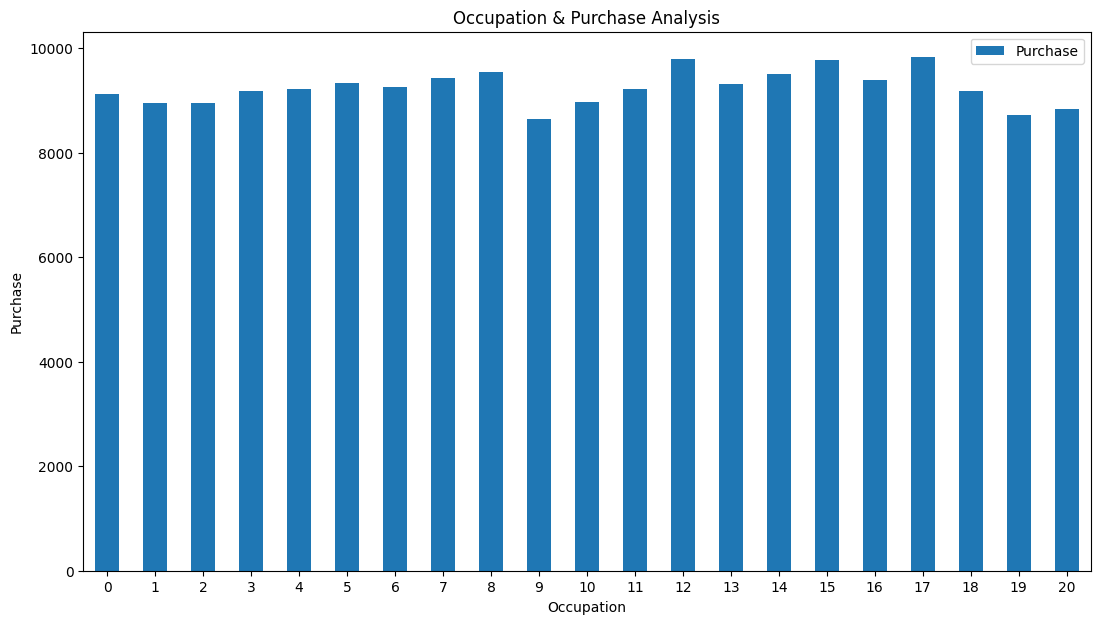

In [32]:
#bivaritae analysis
occupation_plot=df_train.pivot_table(index='Occupation',values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation & Purchase Analysis')
plt.xticks(rotation=0)
plt.show()

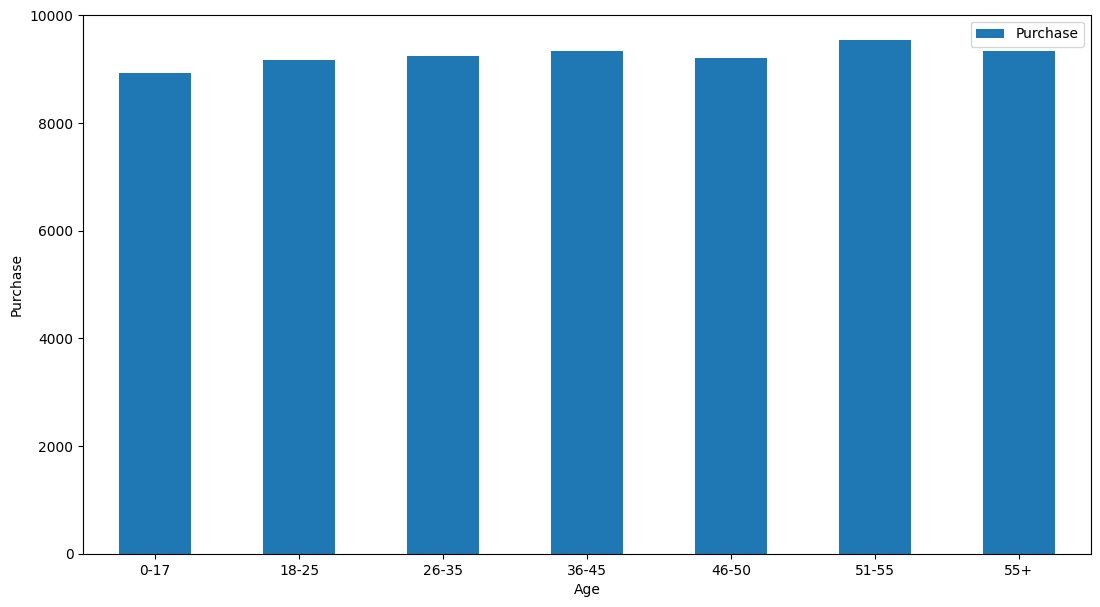

In [33]:
#for age and purchase 
age_plot=df_train.pivot_table(index='Age',values='Purchase',aggfunc=np.mean)
age_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.show()

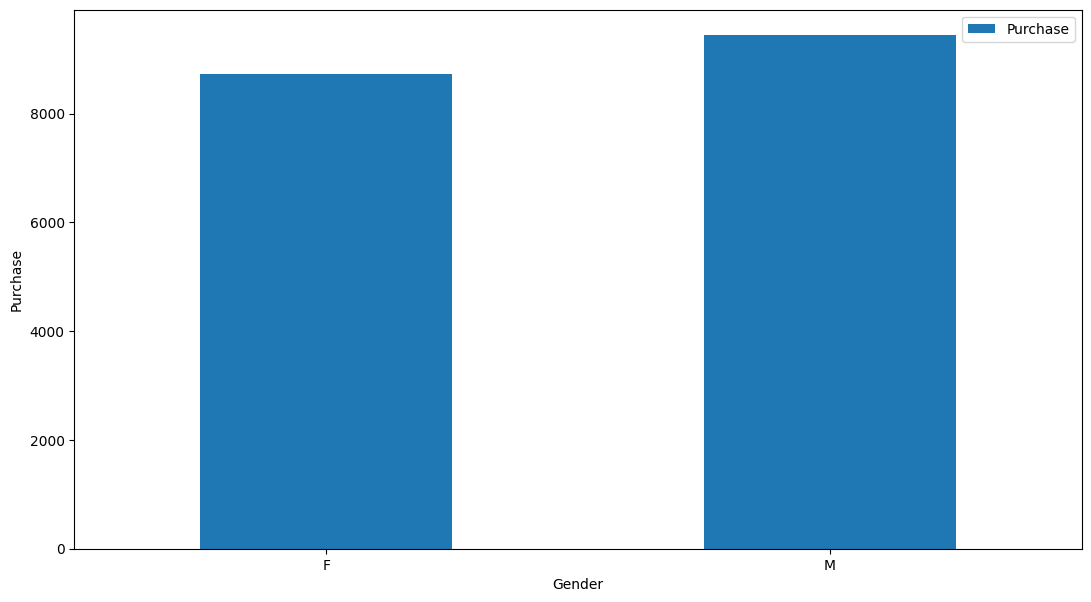

In [34]:
#for gender and purchase
gender_plot=df_train.pivot_table(index='Gender',values='Purchase',aggfunc=np.mean)
gender_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.show()

In [35]:
#check for null values
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [36]:
#filling up the nullvalues
df_train['Product_Category_2']=df_train['Product_Category_2'].fillna(-2.0).astype("float32")
df_train['Product_Category_3']=df_train['Product_Category_3'].fillna(-2.0).astype("float32")

In [37]:
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [38]:
#Using Map function for Categorical Feature of Gender
df_train['Gender']=df_train['Gender'].map({'F':0,'M':1})
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [39]:
#Using Label Encoding for Categorical feature handling
cols=['Age','City_Category','Stay_In_Current_City_Years',]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    df_train[col]=le.fit_transform(df_train[col])

df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [40]:
#droping userid column
#df_train.drop(['User_ID'],axis=1,inplace=True)
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [41]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float32
 10  Product_Category_3          550068 non-null  float32
 11  Purchase                    550068 non-null  int64  
dtypes: float32(2), int64(9), object(1)
memory usage: 46.2+ MB


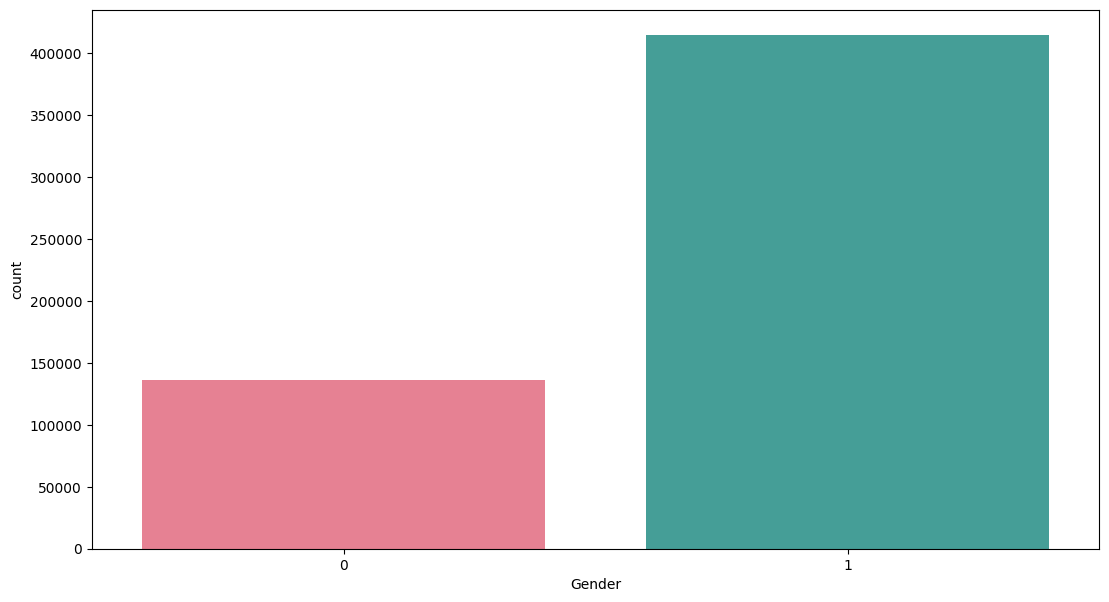

In [49]:
plt.figure(figsize=(13,7))
sns.countplot(data=df_train,x='Gender',palette='husl')
plt.show()

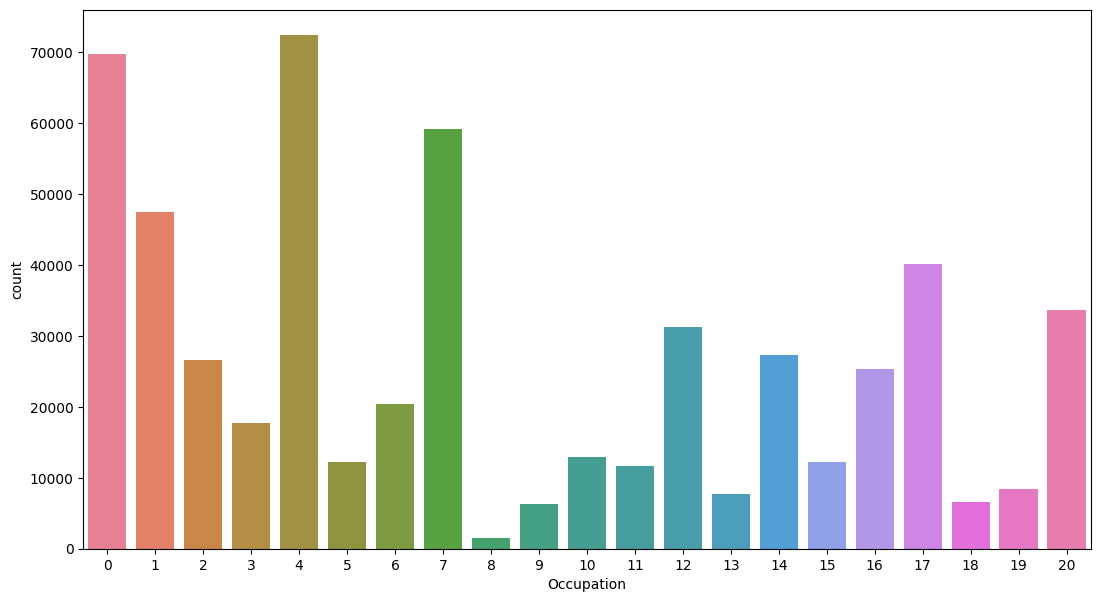

In [50]:
plt.figure(figsize=(13,7))
sns.countplot(data=df_train,x='Occupation',palette='husl')
plt.show()

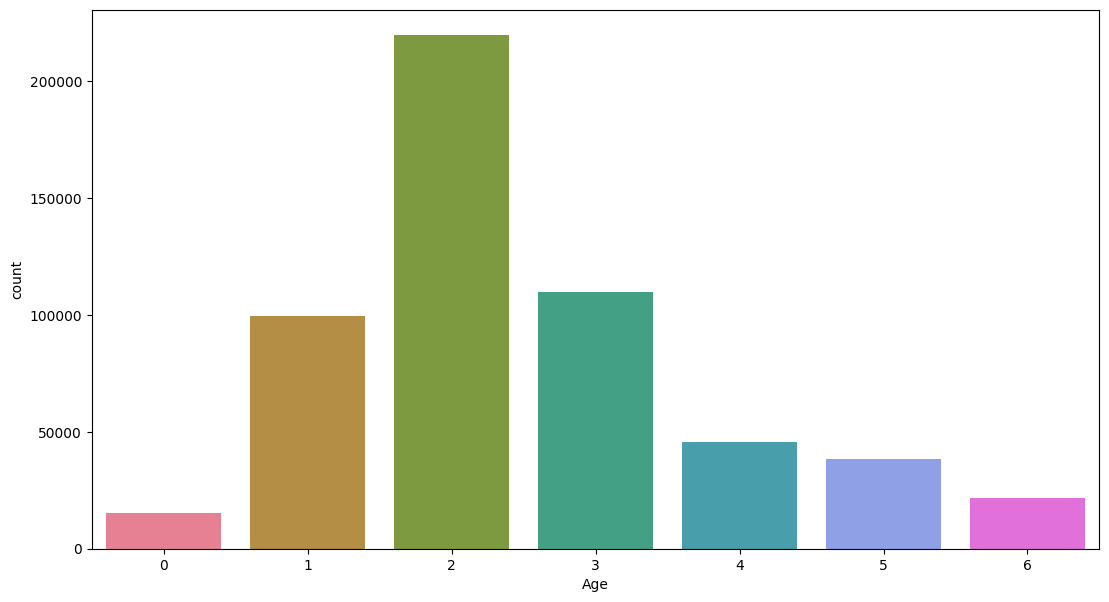

In [51]:
plt.figure(figsize=(13,7))
sns.countplot(data=df_train,x='Age',palette='husl')
plt.show()

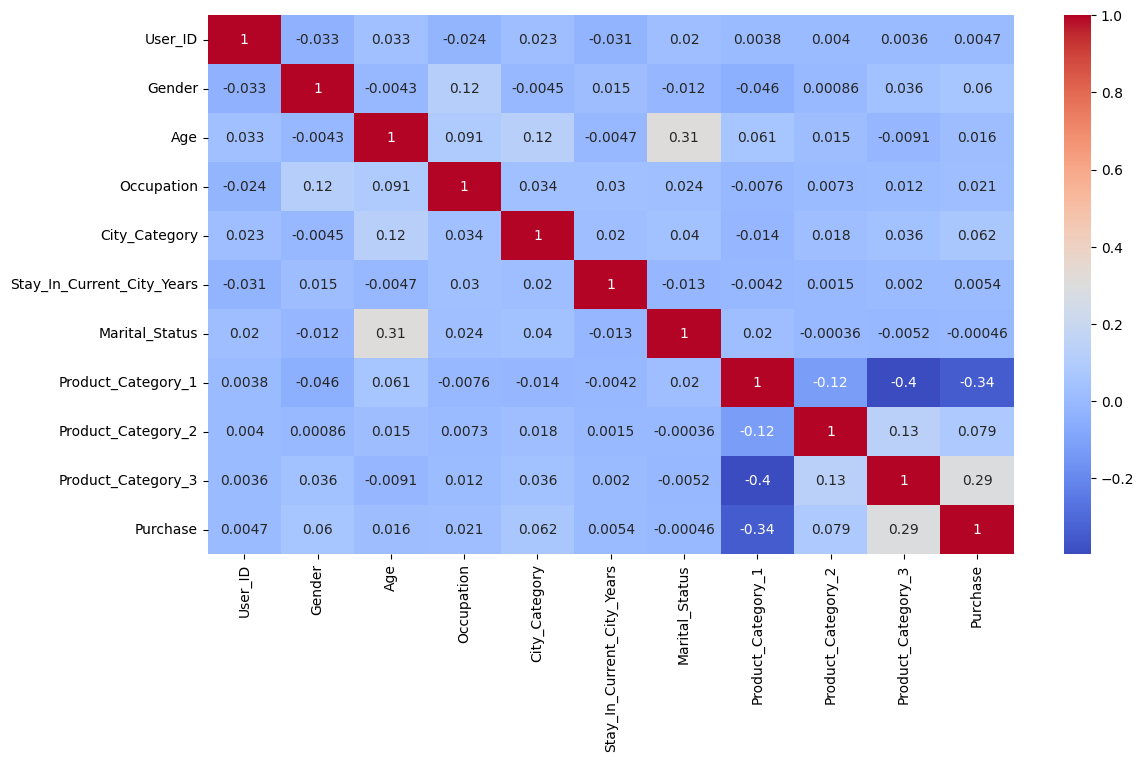

In [42]:
df_train2=df_train.drop(['Product_ID'],axis=1)
#correlation matrix
corr=df_train2.corr()
plt.figure(figsize=(13,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()


In [43]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [44]:
#Train-test split
X=df_train.drop(columns=['Product_ID','Purchase'])
y=df_train['Purchase']

In [45]:
#Model Training
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
    model.fit(X_train,y_train)
    
    #predict the results
    pred=model.predict(X_test)

    #cross validation
    cv_score=cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))

    #print results
    print("Results")
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
    print("CV score:",np.sqrt(cv_score))


Results
RMSE: 4617.879586703179
CV score: 4625.213027257657


<Axes: title={'center': 'Linear Model Coefficient'}>

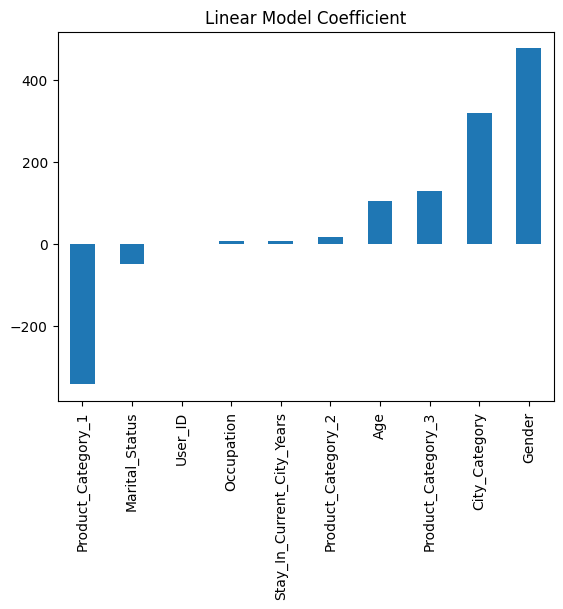

In [46]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
train(model,X,y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Linear Model Coefficient')

Results
RMSE: 3497.1423930142614
CV score: 3469.1259555939837


<Axes: title={'center': 'D_Features Importance'}>

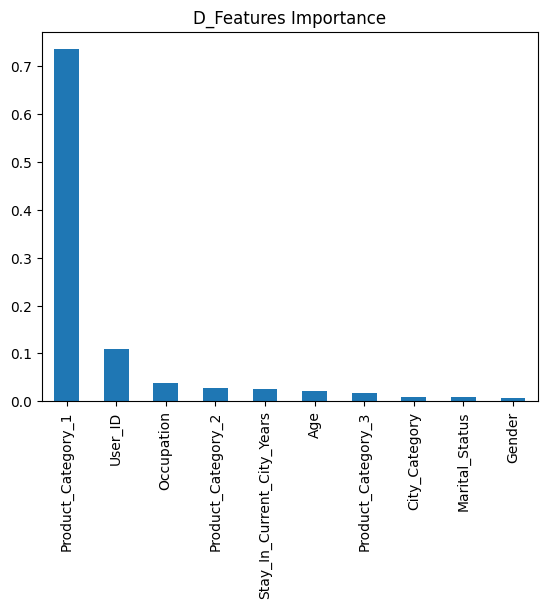

In [47]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,X,y)
d_features=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
d_features.plot(kind='bar',title='D_Features Importance')


Results
RMSE: 2990.4461967031316
CV score: 2987.6048705066887


<Axes: title={'center': 'R_Features Importance'}>

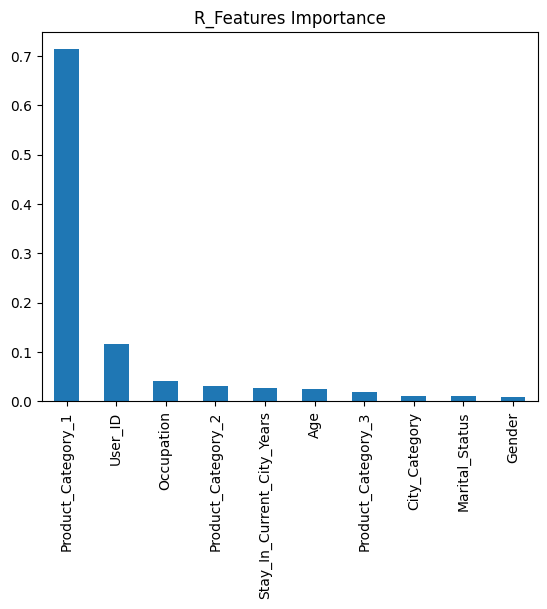

In [48]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
train(model,X,y)
R_features=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
R_features.plot(kind='bar',title='R_Features Importance')

#Better Result is obtained from RandomForestRegressor model